## Estatística Frequências e Medidas
### Desafio Final

Considerando a base de dados de enem_2023.json responda as questões
abaixo (os dados são fictícios).
Você é uma pesquisadora de um cursinho para estudantes que querem
ingressar na universidade em 2025. Seu objetivo é retirar informações da base
de dados do enem do ano anterior para alinhar melhor as estratégias do
cursinho para cada estudante. O dado possui 6 colunas, 5 delas representam
as disciplinas do ENEM e uma o gênero das pessoas que fizeram a prova. No
dado existe a representação de 1000 pessoas, sendo cada uma delas uma
linha.

1. Qual das disciplinas tem a maior amplitude de nota? 

In [48]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

In [27]:
DADOS = "./base_dados/enem_2023.json"

df = pd.read_json(DADOS)
df.head()



,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


In [ ]:
#vefificando valores nulos no dataframe 
valores_nulos = df.isnull().sum()   

# Substituindo valores nulos por "-"
valores_nulos = df.fillna("-")
valores_nulos



In [ ]:
#Gerando um resumo estatístico apenas para as colunas que são numéricas.

disciplinas = df.describe(exclude='object')

# Converter as colunas para numéricas, forçando a conversão (qualquer "-" será tratado como NaN)
disciplinas = disciplinas.apply(pd.to_numeric, errors='coerce')


# Calcular a amplitude de cada disciplina (máximo - mínimo), agora com valores numéricos
amplitude = disciplinas.max() - disciplinas.min()

# Identificar a disciplina com maior amplitude
disciplina_maior_amplitude = amplitude.idxmax()
valor_maior_amplitude = amplitude.max()

print(f"A disciplina com maior amplitude é {disciplina_maior_amplitude} com amplitude de {valor_maior_amplitude:.2f}")

A disciplina com maior amplitude é Redação com amplitude de 884.66


2. Qual é a média e a
mediana para cada uma das disciplinas? (Lembre-se de remover todos os
valores nulos quando considerar a mediana)

In [33]:
# Calcular a média de cada disciplina
media = disciplinas.mean()

# Calcular a mediana de cada disciplina (ignorando valores nulos automaticamente)
mediana = disciplinas.median()

# Exibir resultados
for coluna in disciplinas.columns:
    print(f"Disciplina: {coluna}")
    print(f"  Média: {media[coluna]:.2f}")
    print(f"  Mediana: {mediana[coluna]:.2f}")
    print("-" * 40)

Disciplina: Linguagens
  Média: 516.50
  Mediana: 514.79
----------------------------------------
Disciplina: Ciências humanas
  Média: 522.00
  Mediana: 525.78
----------------------------------------
Disciplina: Ciências da natureza
  Média: 501.55
  Mediana: 499.90
----------------------------------------
Disciplina: Matemática
  Média: 534.95
  Mediana: 534.61
----------------------------------------
Disciplina: Redação
  Média: 598.96
  Mediana: 636.53
----------------------------------------


3. Considerando o curso de Ciência da Computação da UFPE, onde o peso
cada uma das disciplinas ponderado:

    a. Redação - 2

    b. Matemática e suas Tecnologias - 4

    c. Linguagens, Códigos e suas Tecnologias - 2

    d. Ciências Humanas e suas Tecnologias - 1

    e. Ciências da Natureza e suas Tecnologias - 1

Qual o desvio padrão e média das notas dos 500 estudantes mais bem colocados considerando esses pesos?


In [35]:
df.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


In [36]:
#definindo pesos num dicionario
pesos = {
    'Redação': 2,
    'Matemática': 4,
    'Linguagens': 2,
    'Ciências humanas': 1,
    'Ciências da natureza': 1
}
pesos

{'Redação': 2,
 'Matemática': 4,
 'Linguagens': 2,
 'Ciências humanas': 1,
 'Ciências da natureza': 1}

In [ ]:

# Selecionar os 500 melhores colocados. Para isso, vamos somar as notas de todas as disciplinas.

# `df[disciplinas.columns]` seleciona essas colunas no DataFrame `df`. Então, `df[disciplinas.columns]` vai resultar em um novo DataFrame contendo apenas as colunas de notas para as disciplinas.
#- `sum(axis=1) -> Isso resulta na soma das notas de todas as disciplinas para cada estudante.

df['total'] = df[disciplinas.columns].sum(axis=1)
#df['total']


# Ordenar pelos melhores alunos (maiores totais de nota)
#`nlargest()` é utilizada para ordenar as linhas de acordo com a coluna especificada (neste caso, 'total') em ordem **decrescente** (do maior para o menor) e retorna os 500 primeiros valores.
df_top500 = df.nlargest(500, 'total')

# Calcular as notas ponderadas para os 500 melhores
# Multiplicar as notas de cada disciplina pelos seus respectivos pesos
notas_ponderadas = df_top500[disciplinas.columns] * pd.Series(pesos)

# Calcular a soma das notas ponderadas para cada estudante
notas_ponderadas_soma = notas_ponderadas.sum(axis=1)

# Calcular a média ponderada: soma das notas ponderadas dividida pela soma dos pesos
soma_pesos = sum(pesos.values())
media_ponderada = notas_ponderadas_soma.sum() / (500 * soma_pesos)

# Calcular o desvio padrão ponderado
# Primeiramente, calcular a variância ponderada para cada estudante
variancia_ponderada = ((notas_ponderadas - media_ponderada) ** 2 * pd.Series(pesos)).sum(axis=1) / soma_pesos
desvio_padrao_ponderado = np.sqrt(variancia_ponderada.mean())

# Exibir os resultados
print(f"Média ponderada das notas dos 500 melhores colocados: {media_ponderada:.2f}")
print(f"Desvio padrão ponderado das notas dos 500 melhores colocados: {desvio_padrao_ponderado:.2f}")

Média ponderada das notas dos 500 melhores colocados: 556.63
Desvio padrão ponderado das notas dos 500 melhores colocados: 1128.57


4. Se todos esses estudantes aplicassem para ciência da computação e
existem apenas 40 vagas, qual seria a variância e média da nota dos
estudantes que entraram no curso de ciência da computação?

In [ ]:
# Ordenando os estudantes pelas notas ponderadas (maiores para menores)
df['nota_ponderada'] = notas_ponderadas_soma
df_sorted = df.nlargest(500, 'nota_ponderada')

# Selecionando os 40 melhores (considerando as vagas disponíveis)
top_40 = df_sorted.head(40)

# Calculando a média e variância das notas ponderadas dos 40 melhores
media_top_40 = top_40['nota_ponderada'].mean()
variancia_top_40 = top_40['nota_ponderada'].var()


print(f"Média das notas ponderadas dos 40 melhores: {media_top_40:.2f}")
print(f"Variância das notas ponderadas dos 40 melhores: {variancia_top_40:.2f}")


Média das notas ponderadas dos 40 melhores: 6366.83
Variância das notas ponderadas dos 40 melhores: 29576.75


5. Qual o valor do teto do terceiro quartil para as disciplinas de matemática
e linguagens?

O terceiro quartil (Q3) representa o valor que divide o top 25% dos dados, ou seja, 75% dos dados estão abaixo dele e 25% estão acima. Para calcular o teto do terceiro quartil, você precisa identificar o valor correspondente ao terceiro quartil de cada disciplina e arredondá-lo para o valor inteiro superior (teto).

In [47]:

#calculando o terceiro quartil (Q3) para a coluna 'Linguagens' e  'Matemática', que é o valor abaixo do qual 75% dos dados dessa coluna estão localizados.
terceiro_quartil_matematica = np.ceil(df['Matemática'].quantile(0.75))
terceiro_quartil_linguagens = np.ceil(df['Linguagens'].quantile(0.75))


print(f"Teto do terceiro quartil para Matemática: {terceiro_quartil_matematica}")
print(f"Teto do terceiro quartil para Linguagens: {terceiro_quartil_linguagens}")

Teto do terceiro quartil para Matemática: 593.0
Teto do terceiro quartil para Linguagens: 572.0


6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos.
Podemos dizer que são histogramas simétricos, justifique e classifique se
não assimétricas?

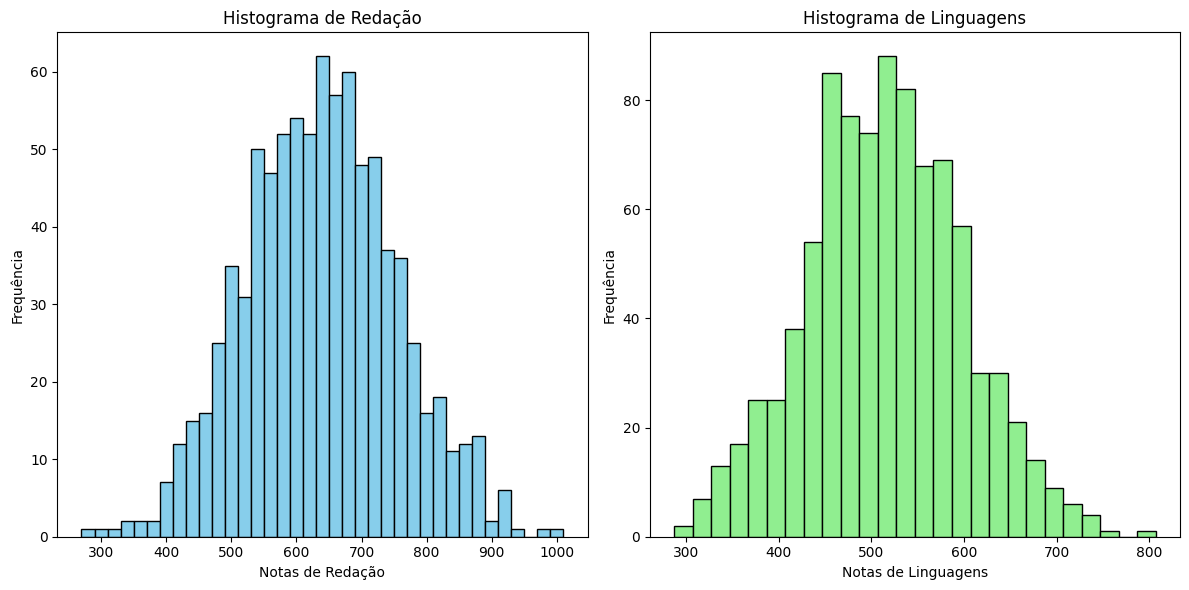

In [ ]:
# Gerar os histogramas para Redação e Linguagens, com intervalos de 20 pontos
plt.figure(figsize=(12, 6))

# Histograma para Redação
plt.subplot(1, 2, 1)
plt.hist(df['Redação'], bins=range(int(df['Redação'].min()), int(df['Redação'].max()) + 20, 20), edgecolor='black', color='skyblue')
plt.title('Histograma de Redação')
plt.xlabel('Notas de Redação')
plt.ylabel('Frequência')

# Histograma para Linguagens
plt.subplot(1, 2, 2)
plt.hist(df['Linguagens'], bins=range(int(df['Linguagens'].min()), int(df['Linguagens'].max()) + 20, 20), edgecolor='black', color='lightgreen')
plt.title('Histograma de Linguagens')
plt.xlabel('Notas de Linguagens')
plt.ylabel('Frequência')


plt.tight_layout()
plt.show()

7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma
opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])

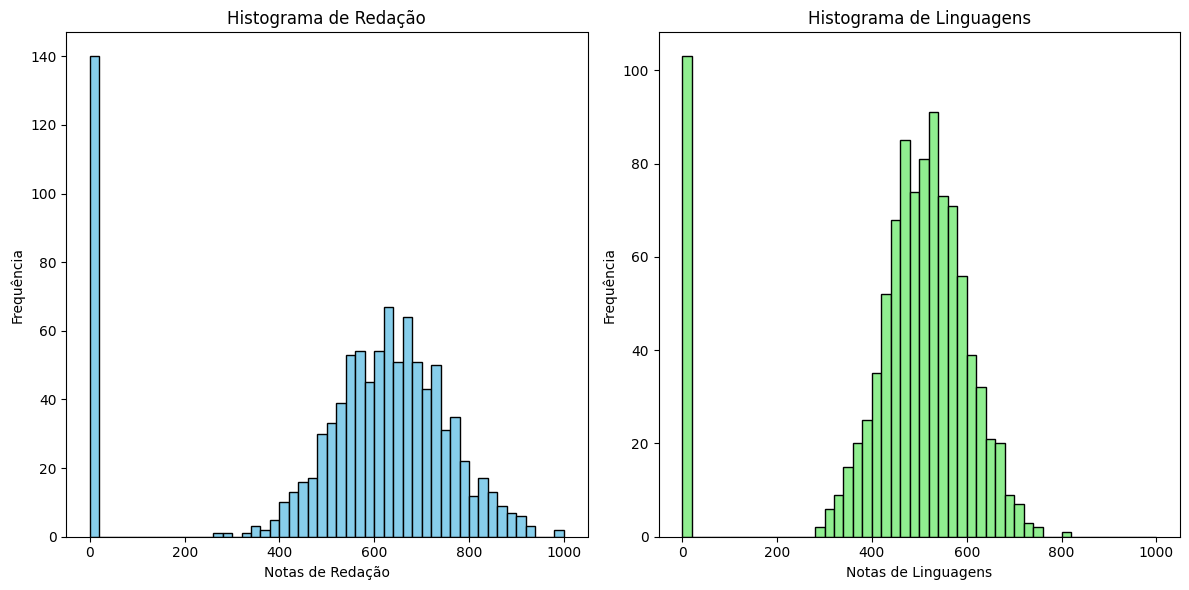

In [56]:
# Gerar os histogramas para Redação e Linguagens, com intervalo fixo de 0 a 1000
plt.figure(figsize=(12, 6))

# Histograma para Redação
plt.subplot(1, 2, 1)
plt.hist(df['Redação'], bins=range(0, 1001, 20), edgecolor='black', color='skyblue', range=[0, 1000])
plt.title('Histograma de Redação')
plt.xlabel('Notas de Redação')
plt.ylabel('Frequência')

# Histograma para Linguagens
plt.subplot(1, 2, 2)
plt.hist(df['Linguagens'], bins=range(0, 1001, 20), edgecolor='black', color='lightgreen', range=[0, 1000])
plt.title('Histograma de Linguagens')
plt.xlabel('Notas de Linguagens')
plt.ylabel('Frequência')

# Exibir os gráficos
plt.tight_layout()
plt.show()

8. Faça um boxplot para as notas de Ciências da Natureza e Redação,
analisando os quartis e identificando possíveis outliers. Utilize o método
IQR (Intervalo Interquartílico) para essa análise.



In [57]:
# Substituir valores nulos nas colunas de interesse por 0
df['Ciências da natureza'] = df['Ciências da natureza'].fillna(0)
df['Redação'] = df['Redação'].fillna(0)

# Calcular os quartis e o IQR para Ciências da Natureza
Q1_ciencias = np.percentile(df['Ciências da natureza'], 25)
Q3_ciencias = np.percentile(df['Ciências da natureza'], 75)
IQR_ciencias = Q3_ciencias - Q1_ciencias

# Calcular os quartis e o IQR para Redação
Q1_redacao = np.percentile(df['Redação'], 25)
Q3_redacao = np.percentile(df['Redação'], 75)
IQR_redacao = Q3_redacao - Q1_redacao

# Calcular os limites inferior e superior para os outliers
limite_inferior_ciencias = Q1_ciencias - 1.5 * IQR_ciencias
limite_superior_ciencias = Q3_ciencias + 1.5 * IQR_ciencias

limite_inferior_redacao = Q1_redacao - 1.5 * IQR_redacao
limite_superior_redacao = Q3_redacao + 1.5 * IQR_redacao

# Exibir os limites de outliers
print(f"Limite inferior para Ciências da Natureza: {limite_inferior_ciencias}")
print(f"Limite superior para Ciências da Natureza: {limite_superior_ciencias}")
print(f"Limite inferior para Redação: {limite_inferior_redacao}")
print(f"Limite superior para Redação: {limite_superior_redacao}")

Limite inferior para Ciências da Natureza: 172.52609480498734
Limite superior para Ciências da Natureza: 755.2440479606877
Limite inferior para Redação: 214.65540554858745
Limite superior para Redação: 991.1633911188876


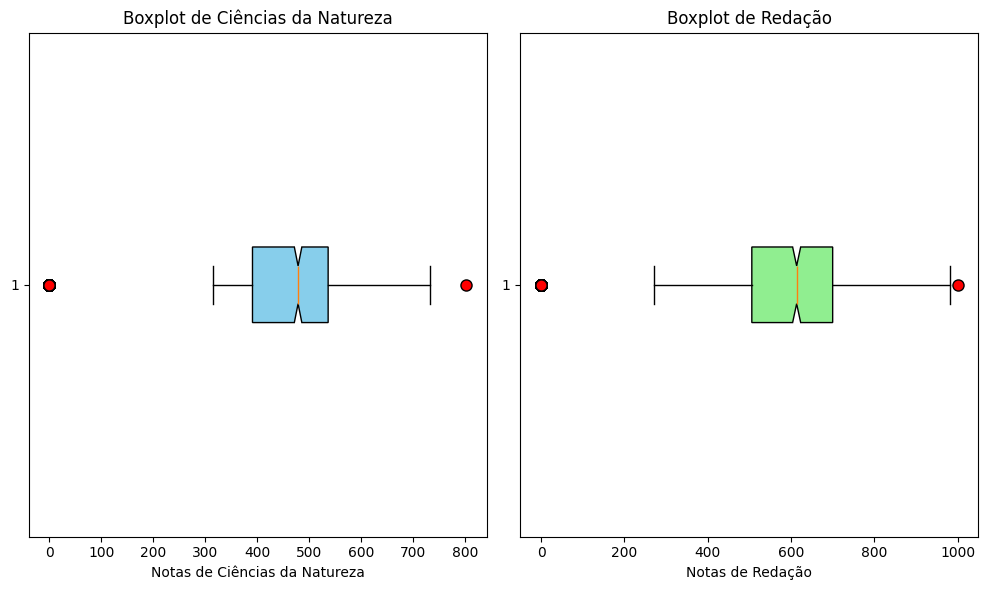

In [58]:

# Criar o boxplot para Ciências da Natureza e Redação
plt.figure(figsize=(10, 6))

# Boxplot para Ciências da Natureza
plt.subplot(1, 2, 1)
plt.boxplot(df['Ciências da natureza'], vert=False, patch_artist=True, notch=True, 
            boxprops=dict(facecolor='skyblue', color='black'), 
            flierprops=dict(markerfacecolor='red', marker='o', markersize=8))
plt.title('Boxplot de Ciências da Natureza')
plt.xlabel('Notas de Ciências da Natureza')

# Boxplot para Redação
plt.subplot(1, 2, 2)
plt.boxplot(df['Redação'], vert=False, patch_artist=True, notch=True, 
            boxprops=dict(facecolor='lightgreen', color='black'), 
            flierprops=dict(markerfacecolor='red', marker='o', markersize=8))
plt.title('Boxplot de Redação')
plt.xlabel('Notas de Redação')

# Exibir os gráficos
plt.tight_layout()
plt.show()

9. Remova todos os outliers e verifique se eles são passíveis de alterar a
média nacional significativamente? (considere significativamente um valor
acima de 5%)

In [60]:
# Substituir valores nulos nas colunas de interesse por 0
df['Ciências da natureza'] = df['Ciências da natureza'].fillna(0)
df['Redação'] = df['Redação'].fillna(0)

# Calcular os quartis e o IQR para Ciências da Natureza
Q1_ciencias = np.percentile(df['Ciências da natureza'], 25)
Q3_ciencias = np.percentile(df['Ciências da natureza'], 75)
IQR_ciencias = Q3_ciencias - Q1_ciencias

# Calcular os quartis e o IQR para Redação
Q1_redacao = np.percentile(df['Redação'], 25)
Q3_redacao = np.percentile(df['Redação'], 75)
IQR_redacao = Q3_redacao - Q1_redacao

# Calcular os limites inferior e superior para os outliers
limite_inferior_ciencias = Q1_ciencias - 1.5 * IQR_ciencias
limite_superior_ciencias = Q3_ciencias + 1.5 * IQR_ciencias

limite_inferior_redacao = Q1_redacao - 1.5 * IQR_redacao
limite_superior_redacao = Q3_redacao + 1.5 * IQR_redacao

# Calcular a média antes de remover os outliers
media_ciencias_original = df['Ciências da natureza'].mean()
media_redacao_original = df['Redação'].mean()

# Remover os outliers (valores fora do intervalo IQR)
df_sem_outliers = df[
    (df['Ciências da natureza'] >= limite_inferior_ciencias) &
    (df['Ciências da natureza'] <= limite_superior_ciencias) &
    (df['Redação'] >= limite_inferior_redacao) &
    (df['Redação'] <= limite_superior_redacao)
]

# Calcular a média após remover os outliers
media_ciencias_sem_outliers = df_sem_outliers['Ciências da natureza'].mean()
media_redacao_sem_outliers = df_sem_outliers['Redação'].mean()

# Calcular a variação percentual da média
variação_percentual_ciencias = ((media_ciencias_original - media_ciencias_sem_outliers) / media_ciencias_original) * 100
variação_percentual_redacao = ((media_redacao_original - media_redacao_sem_outliers) / media_redacao_original) * 100

# Exibir as médias antes e depois, e a variação percentual
print(f"Média original de Ciências da Natureza: {media_ciencias_original}")
print(f"Média de Ciências da Natureza sem outliers: {media_ciencias_sem_outliers}")
print(f"Variação percentual de Ciências da Natureza: {variação_percentual_ciencias}%")

print(f"Média original de Redação: {media_redacao_original}")
print(f"Média de Redação sem outliers: {media_redacao_sem_outliers}")
print(f"Variação percentual de Redação: {variação_percentual_redacao}%")

# Verificar se a variação percentual é maior que 5%
if variação_percentual_ciencias > 5:
    print("A remoção dos outliers de Ciências da Natureza alterou a média significativamente (> 5%)")
else:
    print("A remoção dos outliers de Ciências da Natureza não alterou a média significativamente")

if variação_percentual_redacao > 5:
    print("A remoção dos outliers de Redação alterou a média significativamente (> 5%)")
else:
    print("A remoção dos outliers de Redação não alterou a média significativamente")

Média original de Ciências da Natureza: 411.43604026755935
Média de Ciências da Natureza sem outliers: 501.39269754373544
Variação percentual de Ciências da Natureza: -21.864068402388067%
Média original de Redação: 548.493837579845
Média de Redação sem outliers: 637.96633338318
Variação percentual de Redação: -16.312397637523194%
A remoção dos outliers de Ciências da Natureza não alterou a média significativamente
A remoção dos outliers de Redação não alterou a média significativamente


10. Considerando valores nulos, tente encontrar qual seria a melhor medida
de tendência que pode substituir as notas nulas. Média, moda ou mediana?
Substitua o valor por todos os três e diga qual delas altera menos a média
geral e o desvio padrão.


In [73]:
# Verifique se há concatenamentos estranhos na coluna 'Sexo' (ou a coluna que está causando o erro)
df[df['Sexo'].str.contains("HomemMulher", na=False)]

# Corrigindo a concatenação na coluna 'Sexo', substituindo a string 'HomemMulher' por uma string mais apropriada
df['Sexo'] = df['Sexo'].str.replace('HomemMulher', 'Homem, Mulher')

# Se há mais combinações, como "MulherHomem", podemos fazer uma substituição similar
# Corrigindo a concatenação na coluna 'Sexo', substituindo a string 'MulherHomem' por uma string mais apropriada
df['Sexo'] = df['Sexo'].str.replace('MulherHomem', 'Homem, Mulher')


In [ ]:
# Substituir valores nulos nas colunas de interesse
# Primeiro, calcular as medidas de tendência central (média, mediana, moda)
media_ciencias = df['Ciências da natureza'].mean()
mediana_ciencias = df['Ciências da natureza'].median()
moda_ciencias = df['Ciências da natureza'].mode()[0]

media_redacao = df['Redação'].mean()
mediana_redacao = df['Redação'].median()
moda_redacao = df['Redação'].mode()[0]

# Substituir valores nulos por média, mediana e moda nas respectivas colunas

# Substituir nulos por Média
df_media = df.copy()
df_media['Ciências da natureza'] = df_media['Ciências da natureza'].fillna(media_ciencias)
df_media['Redação'] = df_media['Redação'].fillna(media_redacao)

# Substituir nulos por Mediana
df_mediana = df.copy()
df_mediana['Ciências da natureza'] = df_mediana['Ciências da natureza'].fillna(mediana_ciencias)
df_mediana['Redação'] = df_mediana['Redação'].fillna(mediana_redacao)

# Substituir nulos por Moda
df_moda = df.copy()
df_moda['Ciências da natureza'] = df_moda['Ciências da natureza'].fillna(moda_ciencias)
df_moda['Redação'] = df_moda['Redação'].fillna(moda_redacao)

# Função para calcular média e desvio padrão
def calcular_media_desvio(df):
    media = df.mean().mean()  # Média de todas as colunas
    desvio = df.std().mean()  # Desvio padrão de todas as colunas
    return media, desvio

# Calcular a média e desvio padrão antes de substituir valores nulos
media_original, desvio_original = calcular_media_desvio(df)

# Calcular a média e desvio padrão após substituir por Média
media_media, desvio_media = calcular_media_desvio(df_media)

# Calcular a média e desvio padrão após substituir por Mediana
media_mediana, desvio_mediana = calcular_media_desvio(df_mediana)

# Calcular a média e desvio padrão após substituir por Moda
media_moda, desvio_moda = calcular_media_desvio(df_moda)

# Exibir os resultados
print(f"Média original: {media_original}")
print(f"Desvio padrão original: {desvio_original}")

print(f"\nApós substituir por Média:")
print(f"Média: {media_media}")
print(f"Desvio padrão: {desvio_media}")

print(f"\nApós substituir por Mediana:")
print(f"Média: {media_mediana}")
print(f"Desvio padrão: {desvio_mediana}")

print(f"\nApós substituir por Moda:")
print(f"Média: {media_moda}")
print(f"Desvio padrão: {desvio_moda}")

In [78]:
# Identificar as colunas numéricas do DataFrame
cols_numericas = df_numerico.columns

# Calcular a média e desvio padrão antes de substituir valores nulos
media_original, desvio_original = calcular_media_desvio(df_numerico)

# Calcular a média e desvio padrão após substituir por Média
df_media_numerico = df_media[cols_numericas]  # Garantir que estamos trabalhando apenas com colunas numéricas
media_media, desvio_media = calcular_media_desvio(df_media_numerico)

# Calcular a média e desvio padrão após substituir por Mediana
df_mediana_numerico = df_mediana[cols_numericas]  # Garantir que estamos trabalhando apenas com colunas numéricas
media_mediana, desvio_mediana = calcular_media_desvio(df_mediana_numerico)

# Calcular a média e desvio padrão após substituir por Moda
df_moda_numerico = df_moda[cols_numericas]  # Garantir que estamos trabalhando apenas com colunas numéricas
media_moda, desvio_moda = calcular_media_desvio(df_moda_numerico)

# Exibir os resultados
print(f"Média original: {media_original}")
print(f"Desvio padrão original: {desvio_original}")

print(f"\nApós substituir por Média:")
print(f"Média: {media_media}")
print(f"Desvio padrão: {desvio_media}")

print(f"\nApós substituir por Mediana:")
print(f"Média: {media_mediana}")
print(f"Desvio padrão: {desvio_mediana}")

print(f"\nApós substituir por Moda:")
print(f"Média: {media_moda}")
print(f"Desvio padrão: {desvio_moda}")


Média original: 1494.4007642616082
Desvio padrão original: 235.27211928759874

Após substituir por Média:
Média: 1494.4007642616082
Desvio padrão: 235.27211928759874

Após substituir por Mediana:
Média: 1494.4007642616082
Desvio padrão: 235.27211928759874

Após substituir por Moda:
Média: 1494.4007642616082
Desvio padrão: 235.27211928759874
